# Influence of Noise on Correlation between Entangled particles
## Final Project TN3155 - Group 05

**Mirte van Loenen, Dixit Sabharwal, Niels Holtgrefe and Maciej Styczeń**

## Introduction 

As shown in previous quantum research, quantum systems can violate Bell's inequality or the CHSH-inequality.
This can be shown experimentally. An example is the violation of the inequality using two electron spins separated by 1.3 kilometers, shown by [B. Hensen et al.](https://qutech.nl/wp-content/uploads/2017/03/Loophole-free-Bell-inequality-violation-using-electron-spins-separated-by-1.3-kilometres.pdf) at the TU Delft (see figure below).
We would like to investigate how noise in the system affects entanglement and how much noise the system of quantum particles can take
while still maintaining a correlation that violates the inequality. This is a very interesting subject because we do not know what the results will be, even though simulating noise and its effects have very real applications! The research is done by simulating different types of noise on the $\Psi^-$ (Psi minus) Bell state in QuTiP. 
At first, we will look at uncorrelated types of noise, in other words: the noise on qubit 1 does not affect qubit 2 and vice versa. Later we will take a look at correlated noise, which can give us a more realistic 
representation of noise on real quantum systems.

<div style="display:flex; justify-content:center"><img src="https://qutech.nl/wp-content/uploads/2016/04/pano_full-1024x291.jpg" alt="TU Delft campus"/></div>


In [122]:
from qutip import *

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [8,5]

from ipywidgets import interact
import ipywidgets as widgets

from typing import Callable
import warnings
warnings.filterwarnings(action='ignore')

# code for hiding the code snippets
from IPython.display import HTML
from IPython.display import display


def hide(msg = "Hidden code"):
    # Taken from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
    
    msg_line = f'''<i>{msg} <a href="javascript:code_toggle()">[Open]</a></i>'''
    
    snippet = '''<script>
    code_show=true; 
    function code_toggle() {
        if (code_show){
            $('div.cell.code_cell.rendered.selected div.input').hide();
        } else {
            $('div.cell.code_cell.rendered.selected div.input').show();
        }
        code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>''' + msg_line

    display(HTML(snippet))

hide("Importing the required libraries and functions")

## Description of the physical problem being simulated

### Bell's Theorem and its consequences
#### Bell's Theorem
Let us first give a brief introduction of Bell’s theorem and the connected Bell’s inequality, CHSH inequality, and Tsirelson's bound. 
In short, Bell’s theorem says that local hidden-variables theories can not explain quantum physics. 
Before 1964 it was thought that the probabilistic nature of quantum physics was due to some unaccounted and hidden properties in the quantum particles. 
Bell's famous [paper](https://cds.cern.ch/record/111654/files/vol1p195-200_001.pdf) showed us that this was not the case. The way he proved this was by  deriving a constraint - the so-called Bell's inequality - on the correlation of two entangled quantum particles. He then showed that quantum physics predicts violations of this inequality. Consequently, there must indeed be some sort of 'non-local' hidden variables.

#### Bell's inequality
For completeness we will state the original Bell-inequality below:

$$ | C(a,b) - C(a,c)| \leq 1 + C(b,c) $$

Here $C$ is the correlation of the particle pairs. $a$, $b$ and $c$ correspond to the three settings of the detector.

#### CHSH inequality
The original inequality has a very restricted use, due to the many assumptions. 
Nowadays the CHSH inequality is widely used, as it drops the assumption of perfect correlations. 
However, it still relies on the locality of the systems, in the sense that they are produced by a common source. 
The inequality was introduced in 1969 in a well-known [paper](http://totallyrandom.info/wp-content/uploads/2018/05/Clauser.pdf) by John **C**lauser, Michael **H**orne, Abner **S**himony, and Richard **H**olt. Its mathematical description is as follows:

$$ S = |C(a,b) - C(a, b') + C(a',b) + C(a',b')|\leq 2 $$

Here, $a$ and $a'$ correspond to the settings of the first detector, and similarly for $b$ and $b'$. Note, that in some literature the letter $E$ is used instead of $C$. 

#### <a name="violation" style="color:inherit;">States violating the CHSH inequality
Now that we know how to calculate Bell's parameter $S$, we can show that the $\Psi^-$ Bell state violates this inequality. 
Bell's parameter is calculated for the original $|11\rangle$ state, for the superposition state of the first qubit 
obtained using the Hadamard gate ($\frac{1}{\sqrt{2}}(|0\rangle - |1\rangle) \otimes |1\rangle$), and for the $\Psi^-$ Bell state.

In [123]:
hide()

# two qubits in state 1,1
qubit_1 = basis(2, 1) 
qubit_2 = basis(2, 1)

# transform the two qubits into maximally entangled fourth Bell state
# Hadamard transform the first qubit and use it as the control in the cnot gate on the 2nd qubit
psi_minus =  cnot() * tensor(hadamard_transform() * qubit_1, qubit_2)

def calculate_correlation(init_state):
    # Constructing operators to project spin state onto perpendicular bases
    # z-x basis and 
    # z1-x1 basis, (z-x basis but rotated by 135°)

    S_z = tensor(sigmaz(), identity(2)) 
    S_x = tensor(sigmax(), identity(2)) 

    S_z1 = -1/np.sqrt(2) * tensor(identity(2), sigmaz() + sigmax()) 
    S_x1 =  1/np.sqrt(2) * tensor(identity(2), sigmaz() - sigmax()) 

    # Calulating expected values for each operator for the shared state phi_minus
    # <a> = expect(a, phi)
    exp_S_z_z1 = expect(S_z * S_z1, init_state)
    exp_S_z_x1 = expect(S_z * S_x1, init_state)
    exp_S_x_z1 = expect(S_x * S_z1, init_state)
    exp_S_x_x1 = expect(S_x * S_x1, init_state)

    exp_S = exp_S_z_z1 - exp_S_z_x1 + exp_S_x_z1 + exp_S_x_x1
    return abs(exp_S)

print('For original |11> state:')
print(f'Expected value of spin = {calculate_correlation(tensor(qubit_1, qubit_2))} < 2\n')

print('For state after Hadamard gate (first qubit is in superposition):')
print(f'Expected value of spin = {calculate_correlation(tensor(hadamard_transform() * qubit_1, qubit_2))} < 2\n')

print('For \u03a8\u207b Bell state (the state of both qubits is entangled):')
print(f'Expected value of spin = {calculate_correlation(psi_minus)} > 2\n')

For original |11> state:
Expected value of spin = 1.414213562373095 < 2

For state after Hadamard gate (first qubit is in superposition):
Expected value of spin = 0.0 < 2

For Ψ⁻ Bell state (the state of both qubits is entangled):
Expected value of spin = 2.8284271247461903 > 2



It is clear that the superposition state and the fixed state have total expectations that are in line with the inequality.
But the $\Psi^-$ state's total expectation of the four operators adds up to greater than 2, which according to the CHSH inequality rules out all local hidden variable theories from explaining this correlation.


#### Tsirelson's bound
Finally, let us mention a bound for the correlations when there is no assumption of locality. 
The inequality was named after Boris S. Tsirelson, the Russian mathematician who showed the inequality in an [article](http://www.math.tau.ac.il/~tsirel/download/qbell80.pdf) from 1980.
The inequality is described as follows:

$$ S = |C(a,b) - C(a, b') + C(a',b) + C(a',b')|\leq 2\sqrt{2}$$

This bound is a measurement of how 'non-local' quantum mechanics can be, i.e. by how much can quantum mechanics violate the Bell inequality.


### Noise
The following types of noise are simulated. Note that the first two types of noise are uncorrelated noise, i.e. noise acting on a single qubit without any effect on the other qubit.

* **Decaying noise: **
Energy decay on a single qubit can be simulated by the $2\times2$ matrix $\sqrt{\gamma} \hat \sigma_-$, where $\gamma$ is the rate at which this collapse operator is applied. 
To have uncorrelated energy decay on both qubits you pass both $\sqrt{\gamma} \hat \sigma_- \otimes I$ and $I \otimes \sqrt{\gamma} \hat \sigma_-$ as collapse operators to the Linblad Master equation solver.

* **Dephasing noise: **
The noise caused by the dephasing of a single qubit can be simulated by the $2\times2$ matrix $\gamma \hat \sigma_z$, with $\gamma$ the same as for the energy decay.
To have uncorrelated dephasing noise on both qubits you pass both $\sqrt{\gamma} \hat \sigma_z \otimes I$ and $I \otimes \sqrt{\gamma} \hat \sigma_z$ as collapse operators.

* **Correlated noise : **
One way of creating correlated noise is by taking a tensor product of individual collapse operators. So for example to simulate the correlated energy decay on both qubits we used
the $\sqrt{\gamma_1} \hat \sigma_- \otimes \sqrt{\gamma_2} \hat \sigma_-$ operator. Similarly to have the decay of one qubit correlated with the dephasing of the other, we used the 
$\sqrt{\gamma_1} \hat \sigma_- \otimes \sqrt{\gamma_2} \hat \sigma_z$ operator. Note that $\gamma_1$ and $\gamma_2$ do not have to be equal here.

### Hamiltonian
We also need a Hamiltonian to act on the system. For the Hamiltonian, we will pick the $\sigma_z$ operator (like in lecture 8) on both qubits:

$$
\hat H = \pi ( \hat \sigma_z \otimes \hat \sigma_z )
$$

## What happens when the inequality is not violated anymore?
The goal is to look at the effects of noise on an entangled qubit state and see when the correlation between the two entangled qubits no longer violate the bounds of classical correlation. This bound is given in terms of the CHSH inequality.
What may we conclude if this happens? There actually seem to be a lot of interpretations of this. After some discussion (with Gary) we came to the following conclusions:

The total correlation value calculated according to the CHSH theorem tells us something about the quality of entanglement, and it's numerical value is bounded to a maximum of 2
for correlations in the classical realm. If the total CHSH expectation measured for an entangled quantum system falls below this bound, it should no longer be possible to differentiate
between classical and quantum mechanical correlations.
We translated this to the quality/strength of the entanglement being lowered due to the noise. 


## Aim and scope of the project

In this project we aim to find answers to the following questions:
 
* How much decay noise can a two-particle system handle, while still violating Bell's inequality?

* How much dephasing noise can a two-particle system handle, while still violating Bell's inequality?

* Does it make a difference, whether the noise is on one, or on both particles? 

* Is there a difference between correlated and uncorrelated noise?

* How can we explain the results with our current knowledge?

## Techniques and approach

### Short description of the simulation process
For different types of noise the following steps are taken:

1. Put the two-qubit system in the $\Psi^-$ Bell state.
2. Simulate the noise over time.
3. Calculate the Bell parameter again.

After collecting the data, compare, and conclude!
How to perform the individual steps using QuTiP is explained below:

#### 1. Put the two-qubit system in the $\Psi^-$ Bell state.

To put a two-qubit system in the $\Psi^-$ Bell state, initialise both qubits to be in state $|1\rangle$. Then apply a Hadamard gate to the first qubit and a CNOT (controlled X gate) on the system with
the first qubit as the control qubit. We now went from a system in state $|11\rangle$ to the $\Psi^-$ Bell state $\frac{1}{\sqrt2} (|01\rangle -|10\rangle)$. All four Bell states are
shown in the figures below (which can be easily found when looking up Bell states):

<div style="display:flex; justify-content:space-around; align-items:center">
<img src="https://i.stack.imgur.com/zj9KFm.jpg" alt="bell states">
<img style="width:35%"src="https://i.stack.imgur.com/NjrYpm.png" alt="creating bell states and their initial states">
</div>

This process is done in QuTiP by initializing two qubits in state $|1\rangle$ and then applying the following line of code:

```psi_minus =  cnot() * tensor(hadamard_transform() * qubit_1, qubit_2) ```

This can be seen in the code snippet in the [States violating the CHSH inequality](#violation) section.


#### 2. Simulate the noise over time.
To simulate the noise using QuTiP we need to input a collapse operator (called `c_ops` in the code). This collapse operator is dependent on the type of noise. 
To solve the system you only need to write `mesolve(Hamiltonian, state, time, c_ops)` and provide the corresponding data. Note that the time variable is in 'QuTiP seconds'.

#### 3. Calculate the Bell parameter again. 
This is done in the same way as the initial calculation of the Bell parameter. If the noise has no effect, the outcome will be the same.
If the noise does affect the state, the Bell parameter will go down as it starts at the maximum value of $2\sqrt2$.

Step 2 and 3 are done in the `calculate_expectations(collapse_ops=[], init_state=psi_minus)` function in one of the code snippets below. The time and Hamiltonian for the `mesolve` function
are constant throughout the whole project.


##  Results

In [124]:
hide('''Applying noise and calculating the state of the system using the Lindblad master equation and
Function to plot the expectation of the four CHSH operators on the resulting states''')

def calculate_expectations(collapse_ops=[], init_state=psi_minus):
    """
    Calculate the expectation values of the 4 Hermitian observables needed for CHSH's inequality.
    """
    # Dimensions of Hilbert space
    N = 4

    # frequency
    w = 1 * 2 * np.pi
    H0 = 1/2 * w * tensor(sigmaz(), sigmaz())

    # collapse operators
    c_ops = collapse_ops

    # time intervals of solutions
    t = np.linspace(0,5,100)

    # For time dependent Hamiltonians, we would create a list that includes
    # H0 as the first entry, then a list as the second entry that includes 
    # H1 and then the name of the function f(t)
    # H = [H0, [H1, f]]

    # Hamiltonian
    H = H0
    # Initial state
    psi0 = init_state

    result = mesolve(H, psi0, t, c_ops)

    # Expectation of the 4 Hermitian operators
    z = tensor(sigmaz(), identity(2))
    x = tensor(sigmax(), identity(2))
    z1 = -1/np.sqrt(2) * tensor(identity(2), sigmaz() + sigmax()) 
    x1 =  1/np.sqrt(2) * tensor(identity(2), sigmaz() - sigmax()) 

    __expect = lambda op : expect(op, result.states)
    # plot expectation of projection operators
    z_z1 = __expect(z * z1)
    z_x1 = __expect(z * x1)
    x_z1 = __expect(x * z1)
    x_x1 = __expect(x * x1)
    
    total = abs(z_z1 - z_x1 + x_z1 + x_x1)

    return z_z1, z_x1, x_z1, x_x1, total

def plot_expectations(collapse_ops=[], init_state=psi_minus, plt_title="REQUIRED", display = (True, True, True, True)):
    """
    Plot expectation values.
    """

    z_z1, z_x1, x_z1, x_x1, total = calculate_expectations(collapse_ops, init_state=psi_minus)
    
    if display[0]:
        plt.plot(z_z1, 'r-.', label=r"Expectation value of $z z'$")
    if display[1]:
        plt.plot(z_x1, 'g-', label=r"Exp. val. of $z x'$")
    if display[2]:
        plt.plot(x_z1, 'm:', label=r"Exp. val. of $x z'$")
    if display[3]:
        plt.plot(x_x1, 'c-', label=r"Exp. val. of $x x'$")
    
    plt.plot(total, 'y', label='Sum of expectations', linewidth=3, linestyle='--', dash_capstyle='round')
    plt.axhline(2, color='black', linestyle='--', linewidth = 1, label = 'Classical threshold')

    # find intersection point
    eps = 10e-3
    pos = np.argmin(abs(total - 2))
    val = total[pos]
    if(val - 2 < eps):
        plt.plot(pos,val, color = "orange", marker = "o", label=r"Intersection point")

    plt.ylim(0,3)
    plt.xlabel("t (QuTiP 'seconds')")
    plt.ylabel("CHSH correlation")        
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(plt_title)
    plt.grid()
    plt.show()

    return

In [125]:
hide("Adding interactivity to the graphs to allow changing rate of noise.")

def make_checkbox(desc, width, default_val):
    """
    Generate a checkbox with given parameters.
    """
    return widgets.Checkbox(
        layout={'width': width},
        value=default_val,
        description=desc
    )
    

def make_ui(second_slider: bool):
    """
    Generate the ui for the interactive plot.
    """
    rate_1 = widgets.FloatSlider(
        layout={'width': '60%'},
        orientation='horizontal',
        min=0,
        max=0.5,
        step=0.01,
        description=r'Rate $\gamma_1$:',
        continuous_update=False,
    )

    rate_2 = widgets.FloatSlider(
        layout={'width': '60%'},
        orientation='horizontal',
        min=0,
        max=0.5,
        step=0.01,
        description=r'Rate $\gamma_2$:',
        continuous_update=False,
    )

    zz = make_checkbox(r"$zz'$", "15%", True)
    zx = make_checkbox(r"$zx'$", "15%", True)
    xz = make_checkbox(r"$xz'$", "15%", True)
    xx = make_checkbox(r"$xx'$", "15%", True)

    wgs = [rate_1, widgets.HBox([zz, zx, xz, xx])]
    if second_slider:
        wgs.insert(1, rate_2)

    ui = widgets.VBox(wgs)

    if second_slider:
        return ui, rate_1, rate_2, zz, zx, xz, xx
    else:
        return ui, rate_1, None, zz, zx, xz, xx
    

def interactive_plot(make_plots: Callable[[float, bool, bool, bool, bool], None], second_slider: bool = False) -> None:  
    """ 
    Plot the changing total-expectation, S, as decaying noise is applied to the system
    Plot for different values of Gamma (the rate at which decaying noise is applied)
    """
    
    ui, rate_1, rate_2, zz, zx, xz, xx = make_ui(second_slider)
    

    if second_slider:
        out = widgets.interactive_output(make_plots, {'rate_1': rate_1, 'rate_2': rate_2, 'zz': zz, 'zx': zx, 'xz': xz, 'xx': xx})
    else:
        out = widgets.interactive_output(make_plots, {'rate': rate_1, 'zz': zz, 'zx': zx, 'xz': xz, 'xx': xx})

    return widgets.VBox([ui, out])

### Single qubit noise
Results for single qubit noise are presented in the plots below. The vertical axis represents the CHSH correlation, while the horizontal axis represents the time in QuTIP units.
You can adjust the dephasing/decay rate by using the sliders. Note, that the classical threshold of 2 is marked on the plot, so you can observe at which time point the CHSH correlation drops below that value.

For the decay noise, it does not matter which qubit is perfect and which is noisy, resulting graphs are the same in both cases. At a rate of 0.02 (so $\gamma = \sqrt{0.02\cdot2\pi}$), $C$ is already below 2 before the 100 'QuTiP seconds' mark. 
No matter how high the rate goes, $C$ will not increase again. Instead, $C$ keeps decreasing to 0. If $C$ becomes 0 there is no correlation between the qubits, i.e. the opposite of what we want. If the rate is higher, $C$ decreases faster. 

Similarly, when applying dephasing noise to a single qubit the CHSH correlation drops below the $C = 2$ mark and the steepness of the curve depends on the dephasing rate. 
However, single qubit dephasing noise gives a slightly different result than decay noise: instead of $C$ dropping to 0 it drops to $\sqrt2$, which is the same $C$ as for the $|00\rangle$ or the $|11\rangle$ state. 
Dephasing reaches its "final" $C$ slightly faster than with energy decay. This could simply be because $\sqrt2$ is closer to $2\sqrt2$ than 0.

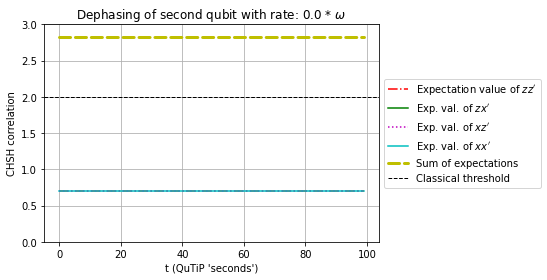

In [126]:
hide("Plot expectation of CHSH operators as one qubit decays or dephases.")

# Only one of the qubits experiences noise

plt.rcParams["figure.figsize"] = [6,4]

def decaying_noise_q1(rate, zz, zx, xz, xx):
    gamma = np.sqrt(rate * 2 * np.pi)
    title = r"Decaying of first qubit with rate: {} * $\omega$ ".format(rate)
    plot_expectations(collapse_ops=[tensor(gamma * sigmam(), identity(2))], plt_title=title, display = (zz, zx, xz, xx))

plot_1 = interactive_plot(decaying_noise_q1)

def decaying_noise_q2(rate, zz, zx, xz, xx):
    gamma = np.sqrt(rate * 2 * np.pi)
    title = r"Decaying of second qubit with rate: {} * $\omega$ ".format(rate)
    plot_expectations(collapse_ops=[tensor(identity(2), gamma * sigmam())], plt_title=title, display = (zz, zx, xz, xx))

plot_2 = interactive_plot(decaying_noise_q2)

display(widgets.HBox([plot_1, plot_2]))


def dephasing_noise_q1(rate, zz, zx, xz, xx):
    gamma = np.sqrt(rate * 2 * np.pi)
    title = r"Dephasing of first qubit with rate: {} * $\omega$ ".format(rate)
    plot_expectations(collapse_ops=[tensor(gamma * sigmaz(), identity(2))], plt_title=title)

plot_3 = interactive_plot(dephasing_noise_q1)

def dephasing_noise_q2(rate, zz, zx, xz, xx):
    gamma = np.sqrt(rate * 2 * np.pi)
    title = r"Dephasing of second qubit with rate: {} * $\omega$ ".format(rate)
    plot_expectations(collapse_ops=[tensor(identity(2), gamma * sigmaz())], plt_title=title)

plot_4 = interactive_plot(dephasing_noise_q2)

display(widgets.HBox([plot_3, plot_4]))


### Correlated and uncorrelated noise

After discussing qubit noise on a single qubit, let's move on to investigate how the CHSH correlation behaves when noise is applied to both qubits.
Results of the experiments are visualized on the plots below, the axis variables are the same as in the previous section.

#### Both qubits decaying independently

When there is energy decay on both qubits without any correlation, $C$ first goes down to zero, corresponding to states $|01\rangle$ and $|10\rangle$, and directly after that bounces back up to $\sqrt2$, corresponding to the $|11\rangle$ ground state. 
If one or both the decay rates is higher this whole proces goes faster, which is to be expected. 
It does not seem to make a difference which rates are changed. It does, however, make a difference whether you multiply one rate by 4 or both rates by 2. 
Multiplying both rates by 2, results in a significantly faster proces than multiplying one rate by 4 (which of the two rates you multipy by 4 does not make a difference).

#### Correlated energy decay

Correlated decay noise has _no_ effect on its $C$ for all combinations of $\gamma_1$ and $\gamma_2$. As we cannot currently explain why this happens, we will investigate this more in the next section.


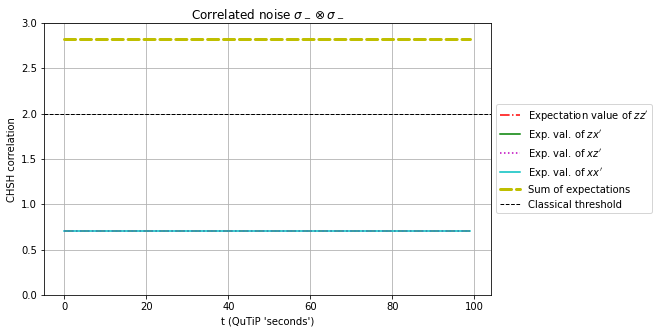

In [127]:
hide("Plot expectation of CHSH operators as both qubits decay.")

# Noise is applied to both qubits

plt.rcParams["figure.figsize"] = [8,5]

def __decaying_noise_q12(rate_1, rate_2, zz, zx, xz, xx):
    gamma_1 = np.sqrt(rate_1 * 2 * np.pi)
    gamma_2 = np.sqrt(rate_2 * 2 * np.pi)
    title = r"Uncorrelated noise $(\sigma_- \otimes I) + (I \otimes \sigma_-)$"
    plot_expectations(collapse_ops=[tensor(gamma_1 * sigmam(), identity(2)), tensor(identity(2), gamma_2 * sigmam())], plt_title=title, display = (zz, zx, xz, xx))

plot_1 = interactive_plot(__decaying_noise_q12, second_slider=True)

def decaying_noise_q12(rate_1, rate_2, zz, zx, xz, xx):
    gamma_1 = np.sqrt(rate_1 * 2 * np.pi)
    gamma_2 = np.sqrt(rate_2 * 2 * np.pi)
    title = r"Correlated noise $\sigma_- \otimes  \sigma_-$"
    plot_expectations(collapse_ops=[tensor(gamma_1 * sigmam(), gamma_2 * sigmam())], plt_title=title, display = (zz, zx, xz, xx))

plot_2 = interactive_plot(decaying_noise_q12, second_slider=True)

display(widgets.HBox([plot_1, plot_2]))


#### Decay on qubit one and dephasing on qubit two

Uncorrelated decay on qubit one and dephasing on qubit two results in a slightly slower decrease of $C$ than when they are correlated. In both cases, $C$ goes down to zero and stays there, although the expectation values that add up to $C$ differ. 

There is also a large difference between the correlated and uncorrelated case when $\gamma_1$ is very large and $\gamma_2$ is very small (so barely any dephasing noise) or the other way around (no energy decay). 
With very little decay both $C$'s go to zero very slowly, but in the uncorrelated case $C$ is reached much faster. With very little dephasing $C = 0$ is reached very fast in the uncorrelated case and very very slow in the correlated case.

Because we simulated the correlated noise using a tensor product, having either decay or dephasing noise at zero produces a zero matrix as collapse operator. This tells us that with correlated noise the effect of its correlation 
is directly visable, whereas in the uncorrelated case on type of noise has no influence on the rest of the system. This would also mean that when all kinds of noise are correlated it may be harder to find out which noise is causing 
a desired or measured effect.  


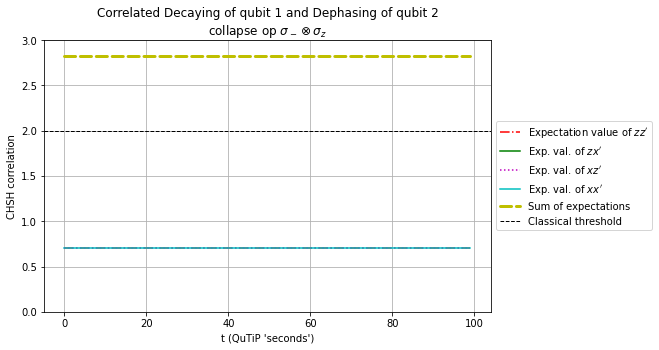

In [128]:
hide("Plot expectation of CHSH operators as qubit one decays while qubit two dephases.")

def __decayq1_dephaseq2(rate_1, rate_2, zz, zx, xz, xx):
    gamma_1 = np.sqrt(rate_1 * 2 * np.pi)
    gamma_2 = np.sqrt(rate_2 * 2 * np.pi)
    title = r"Uncorrelated Decaying of qubit 1 and Dephasing of qubit 2" "\n" r"collapse op $\sigma_- \otimes I + I \otimes \sigma_z$"
    plot_expectations(collapse_ops=[tensor(gamma_1 * sigmam(), identity(2)), tensor(identity(2), gamma_2 * sigmaz())], plt_title=title, display = (zz, zx, xz, xx))

plot_1 = interactive_plot(__decayq1_dephaseq2, second_slider=True)


def decayq1_dephaseq2(rate_1, rate_2, zz, zx, xz, xx):
    gamma_1 = np.sqrt(rate_1 * 2 * np.pi)
    gamma_2 = np.sqrt(rate_2 * 2 * np.pi)
    title = r"Correlated Decaying of qubit 1 and Dephasing of qubit 2" "\n" r"collapse op $\sigma_- \otimes  \sigma_z$"
    plot_expectations(collapse_ops=[tensor(gamma_1 * sigmam(), gamma_2 * sigmaz())], plt_title=title, display = (zz, zx, xz, xx))

plot_2 = interactive_plot(decayq1_dephaseq2, second_slider=True)

display(widgets.HBox([plot_1, plot_2]))


### Diving deeper into correlated energy decay

As correlated decay noise had some interesting and unexpected results, we will now dive deeper into this subject to try and understand what is happening 
and to make sure that the the observations are not due to oversight in our code.

*In QuTiP notation $|0\rangle$ is the excited state while $|1\rangle$ is the ground state, this can be easily verified by applying the $\sigma_-$ operator to the $|0\rangle$ and $|1\rangle$ states and displaying the results.*

We first try to see the effects of the $(\sigma_- \otimes  \sigma_-)$ correlated noise on the $|00\rangle$ excited state where no entaglement exists between the particles. 

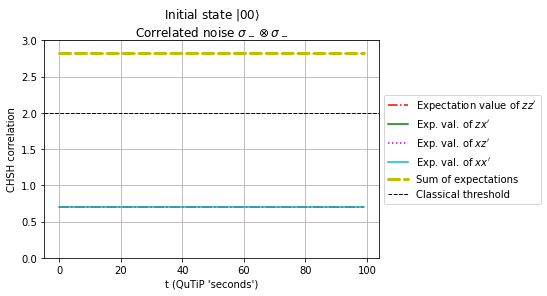

In [136]:
hide("Plot decay of excited |00> state to |11> state through the correlated operator")

def decaying_noise_q12_00(rate_1, rate_2, zz, zx, xz, xx):
    gamma_1 = np.sqrt(rate_1 * 2 * np.pi)
    gamma_2 = np.sqrt(rate_2 * 2 * np.pi)
    title = r"Initial state $|00\rangle$" "\n" r"Correlated noise $\sigma_- \otimes  \sigma_-$"
    plot_expectations(collapse_ops=[tensor(gamma_1 * sigmam(), gamma_2 * sigmam())], init_state=tensor(basis(2,0), basis(2,0)), plt_title=title, display = (zz, zx, xz, xx))

display(interactive_plot(decaying_noise_q12_00, second_slider=True))

The results are the same, the CHSH correlations of the state are not affected by the noise at any rate.

To see if the state of the two qubit system is changing when the $(\sigma_- \otimes  \sigma_-)$ noise is applied, we can print the expected values of the four basis states $|00\rangle$, $|01\rangle$, $|10\rangle$$, |11\rangle$.

In [142]:
hide("Funtion to plot the expected values of the four basis operators of the two qubit system.")

def __rho_expectation(collapse_ops=[], init_state=psi_minus, plt_title="REQUIRED"):
    """
    Calculate the expectation values of the 4 Hermitian observables needed for CHSH's inequality.
    """
    # Dimensions of Hilbert space
    N = 4

    # frequency
    w = 1 * 2 * np.pi
    H0 = 1/2 * w * tensor(sigmaz(), sigmaz())

    # collapse operators
    c_ops = collapse_ops

    # time intervals of solutions
    t = np.linspace(0,5,200)

    # For time dependent Hamiltonians, we would create a list that includes
    # H0 as the first entry, then a list as the second entry that includes 
    # H1 and then the name of the function f(t)
    # H = [H0, [H1, f]]

    # Hamiltonian
    H = H0
    # Initial state
    psi0 = init_state

    result = mesolve(H, psi0, t, c_ops)

    # projection operators for the four basis states
    __get_state = lambda x, y : ket2dm(tensor(basis(2, x), basis(2, y)))
    rho_00 = __get_state(0, 0)
    rho_01 = __get_state(0, 1)
    rho_10 = __get_state(1, 0)
    rho_11 = __get_state(1, 1)


    # calculate expectations of operator
    vals_rho_00 = expect(rho_00, result.states)
    vals_rho_01 = expect(rho_01, result.states)
    vals_rho_10 = expect(rho_10, result.states)
    vals_rho_11 = expect(rho_11, result.states)

    plt.plot(vals_rho_00, 'r-.', label=r"Expectation value of $\rho_{00}$")
    plt.plot(vals_rho_01, 'y-.', label=r"Expectation value of $\rho_{01}$")
    plt.plot(vals_rho_10, 'g-.', label=r"Expectation value of $\rho_{10}$")
    plt.plot(vals_rho_11, 'b-.', label=r"Expectation value of $\rho_{11}$")

    plt.ylim(0, 1)
    plt.xlabel("t (QuTiP 'seconds')")
    plt.ylabel("Amplitude")        
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(plt_title)
    plt.grid()
    plt.show()
    return

def __interactive_plot(make_plots):
    rate_1 = widgets.FloatSlider(
        layout={'width': '60%'},
        orientation='horizontal',
        min=0,
        max=1,
        step=0.01,
        description=r'Rate $\gamma_1$:',
        continuous_update=False,
    )

    rate_2 = widgets.FloatSlider(
        layout={'width': '60%'},
        orientation='horizontal',
        min=0,
        max=1,
        step=0.01,
        description=r'Rate $\gamma_2$:',
        continuous_update=False,
    )

    ui  = widgets.VBox([rate_1, rate_2])
    out = widgets.interactive_output(make_plots, {'rate_1': rate_1, 'rate_2': rate_2})

    return widgets.VBox([ui, out])

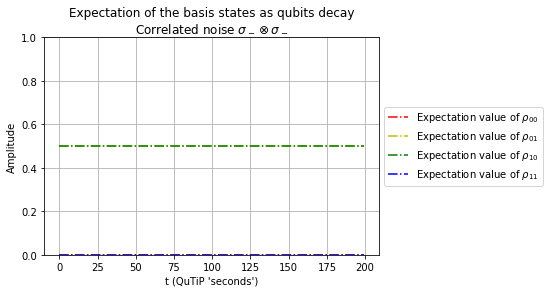

In [143]:
hide("Plot the expectations of the four basis states as the system evolves with noise.")
plt.rcParams["figure.figsize"] = [6, 4]

def plot_rho_with_uncorrelated_qubits_decay(rate_1, rate_2):
    gamma_1 = np.sqrt(rate_1 * 2 * np.pi)
    gamma_2 = np.sqrt(rate_2 * 2 * np.pi)
    title = r"Expectation of the basis states as qubits decay" "\n" r"Uncorrelated noise $(\sigma_- \otimes I) + (I \otimes \sigma_-)$"
    __rho_expectation(collapse_ops=[tensor(gamma_1 * sigmam(), identity(2)), tensor(identity(2), gamma_2 * sigmam())], plt_title=title)

plot_1 = __interactive_plot(plot_rho_with_uncorrelated_qubits_decay)

def plot_rho_with_correlated_qubits_decay(rate_1, rate_2):
    gamma_1 = np.sqrt(rate_1 * 2 * np.pi)
    gamma_2 = np.sqrt(rate_2 * 2 * np.pi)
    title = r"Expectation of the basis states as qubits decay" "\n" r"Correlated noise $\sigma_- \otimes  \sigma_-$"
    __rho_expectation(collapse_ops=[tensor(gamma_1 * sigmam(), gamma_2 * sigmam())], plt_title=title)

plot_2 = __interactive_plot(plot_rho_with_correlated_qubits_decay)

display(widgets.HBox([plot_1, plot_2]))

## Summary and Outlook

Applying energy decay or dephasing noise on a single qubit of the Bell state with $\gamma \geq \sqrt{0.2\cdot2\pi}$ resuls in $C \leq 2$ within 100 'QuTiP seconds' and thus not violating the CHSH inequality anymore. Applying the noise to the second qubit produces the same
results as applying it to the first. When both qubits experience energy decay the state first decays to $|01\rangle$ or $|10\rangle$ with $C$ equal to zero. After this it decays to the ground state $|11\rangle$ which corresponds to $c = \sqrt2$.  This greatly differs
from the case where the energy decay of the 

We have now provided a solid basis for researching the effects of noise on a system described by the CHSH inequality. This information can be used to predict how quantum systems will behave and
give a metric on the quality of the system. However, we've only scraped the surface
of different types of noise and especially types of correlated noise. Also, initializing the state and entangling the qubits is done perfectly in QuTiP, but this may not be the case
for real life quantum systems. If we would have had more time we would choose and combine types of noise and look at different Hamiltonians (like time-dependent ones) with the goal of simulating a real quantum system, which would
 first require more research on noise. Luckily, noise (and noise resilience) is a heavily researched topic in the [NISQ](https://arxiv.org/abs/1801.00862) era, as perfect qubits are still a distant dream. 

## References

1. Bell, J.S., _"On the Einstein Podolsky Rosen Paradox"_, Physics Vol. 1, No. 3, pp. 195-290, Nov. 1964, 
[URL](https://cds.cern.ch/record/111654/files/vol1p195-200_001.pdf)

1. Brukner, C., & Zukowski, M., _"Bell’s Inequalities: Foundations and Quantum Communication"_, Sep. 2009,
[URL](https://arxiv.org/pdf/0909.2611.pdf)

1. Clauser, J.F., et al., _"Proposed Experiment to Test Local Hidden-Variable Theories"_, Phys. Rev. Let. 23, Oct 1969,
[URL](https://www.researchgate.net/publication/228109500_Proposed_Experiment_to_Test_Local_Hidden-Variable_Theories)

1. Hensen, B., et al., _"Loophole-free Bell inequality violation using electron spins separated by 1.3 kilometres"_, Nature Vol. 526, pp 682–686, Oct. 2015,
[URL](https://www.nature.com/articles/nature15759/)

1. Lo, HP., et al., _"Experimental violation of Bell inequalities for multi-dimensional systems"_, Sci. Rep. 6, 22088, Feb 2016,
[URL](https://www.nature.com/articles/srep22088)

1. Myrvold, W., et al., _"Bell's Theorem"_, The Stanford Encyclopedia of Philosophy, Last accessed on 3-12-2020,
[URL](https://plato.stanford.edu/entries/bell-theorem/#ProoTheoBellType)

1. Preskill, J., _"Quantum Computing in the NISQ era and beyond"_, Quantum 2, 79, Jan. 2018, 
[URL](https://arxiv.org/abs/1801.00862)

1. Rashkovskiy, S.A., _"What does a violation of the Bell’s inequality prove?"_, Jan. 2017, 
[URL](https://arxiv.org/abs/1701.03700)

1. Tittel, W., et al., _"Violation of Bell inequalities by photons more than 10 km apart"_, Phys. Rev. Lett. 81, Jun. 1998, 
[URL](https://arxiv.org/abs/quant-ph/9806043)

1. Tsirelson, B., _"Quantum generalizations of Bell's inequality"_, Letters in Mathematical Physics 4, 1980,
[URL](https://www.tau.ac.il/~tsirel/download/qbell80.html)

<div style="display:flex; justify-content:center"><img style="width:535px" src="https://i.redd.it/t4cdd7j2sww11.jpg" alt="spooky meme"/></div>